# Projeto 1

**Escreva um programa de computador capaz de ampliar e reduzir uma imagem por meio da interpolação bilinear. A entrada para o seu programa é a resolução desejada (em dpi) do resultado da imagem e a saída a imagem interpolada.**

"
DPI (Dots Per Inch) é uma medida que indica a resolução de uma imagem ou dispositivo de impressão. Ela refere-se ao número de pontos (ou pixels) que podem ser exibidos ou impressos em uma polegada linear. Quanto maior o DPI, mais detalhada e nítida é a imagem, pois há mais pontos por polegada.
"


In [12]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [13]:
def redimensiona_bilinear(imagem, nova_largura, nova_altura):
    altura_original, largura_original = imagem.shape
    imagem_redimensionada = np.zeros((nova_altura, nova_largura), dtype=np.float32)

    escala_x = largura_original / nova_largura
    escala_y = altura_original / nova_altura

    for i in range(nova_altura):
        for j in range(nova_largura):
            # Coordenadas na imagem original
            x = j * escala_x
            y = i * escala_y

            # Coordenadas dos quatro pixels vizinhos
            x0 = int(np.floor(x))
            x1 = min(x0 + 1, largura_original - 1)
            y0 = int(np.floor(y))
            y1 = min(y0 + 1, altura_original - 1)

            # Diferenças entre os pixels e as coordenadas reais
            dx = x - x0
            dy = y - y0

            # Interpolação bilinear
            pixel = (imagem[y0, x0] * (1 - dx) * (1 - dy) +
                     imagem[y0, x1] * dx * (1 - dy) +
                     imagem[y1, x0] * (1 - dx) * dy +
                     imagem[y1, x1] * dx * dy)

            imagem_redimensionada[i, j] = pixel

    return imagem_redimensionada

In [10]:
original = "/content/drive/MyDrive/PDI/assets/Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif"
lighthouse = "drive/MyDrive/PDI/assets/thelighthouse.jpg"
ana = "drive/MyDrive/PDI/assets/ana.jpg"
smiths = "drive/MyDrive/PDI/assets/smiths.jpg"
syd = "drive/MyDrive/PDI/assets/syd.jpg"

# Carrega a imagem com OpenCV
imagem = cv2.imread(lighthouse, cv2.IMREAD_GRAYSCALE)

# Carrega a imagem com Pillow para acessar os metadados
imagem_pil = Image.open(lighthouse)

# Obtém o DPI da imagem, se disponível
dpi_original = imagem_pil.info.get('dpi', (72, 72))

print(f"DPI da imagem: {dpi_original}")
print(f"Shape: {imagem.shape}")

DPI da imagem: (300.0, 300.0)
Shape: (2263, 2700)


Dimensões da imagem redimensionada: (543, 648)


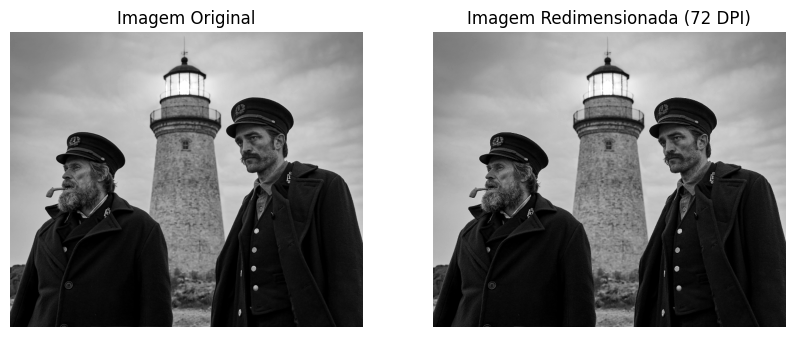

In [14]:
dpi_desejado = 72
escala = dpi_desejado / dpi_original[0]

# Calcula a nova largura e altura com base no fator de escala
nova_largura = int(imagem.shape[1] * escala)
nova_altura = int(imagem.shape[0] * escala)

# Redimensiona a imagem usando interpolação bilinear
# imagem_redimensionada = cv2.resize(imagem, (nova_largura, nova_altura), interpolation=cv2.INTER_LINEAR)
imagem_redimensionada = redimensiona_bilinear(imagem, nova_largura, nova_altura)

print(f"Dimensões da imagem redimensionada: {imagem_redimensionada.shape}")

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(imagem, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Imagem Original")
axes[1].imshow(imagem_redimensionada, cmap='gray')
axes[1].set_title(f"Imagem Redimensionada ({dpi_desejado} DPI)")
axes[1].axis('off')
plt.show()

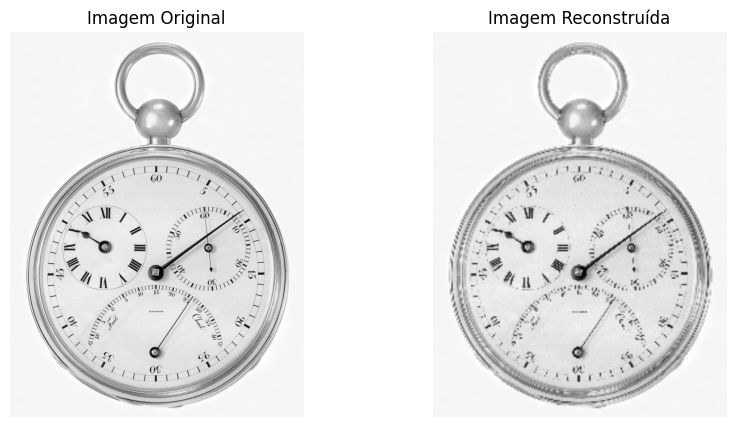

In [ ]:
img_reconstruida = cv2.resize(imagem_redimensionada, (imagem.shape[1], imagem.shape[0]), interpolation=cv2.INTER_LINEAR)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imagem, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Imagem Original")
axes[1].imshow(img_reconstruida, cmap='gray')
axes[1].set_title("Imagem Reconstruída")
axes[1].axis('off')
plt.show()